In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

c:\Users\VisionLab\anaconda3\envs\pytorch\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# RD curve

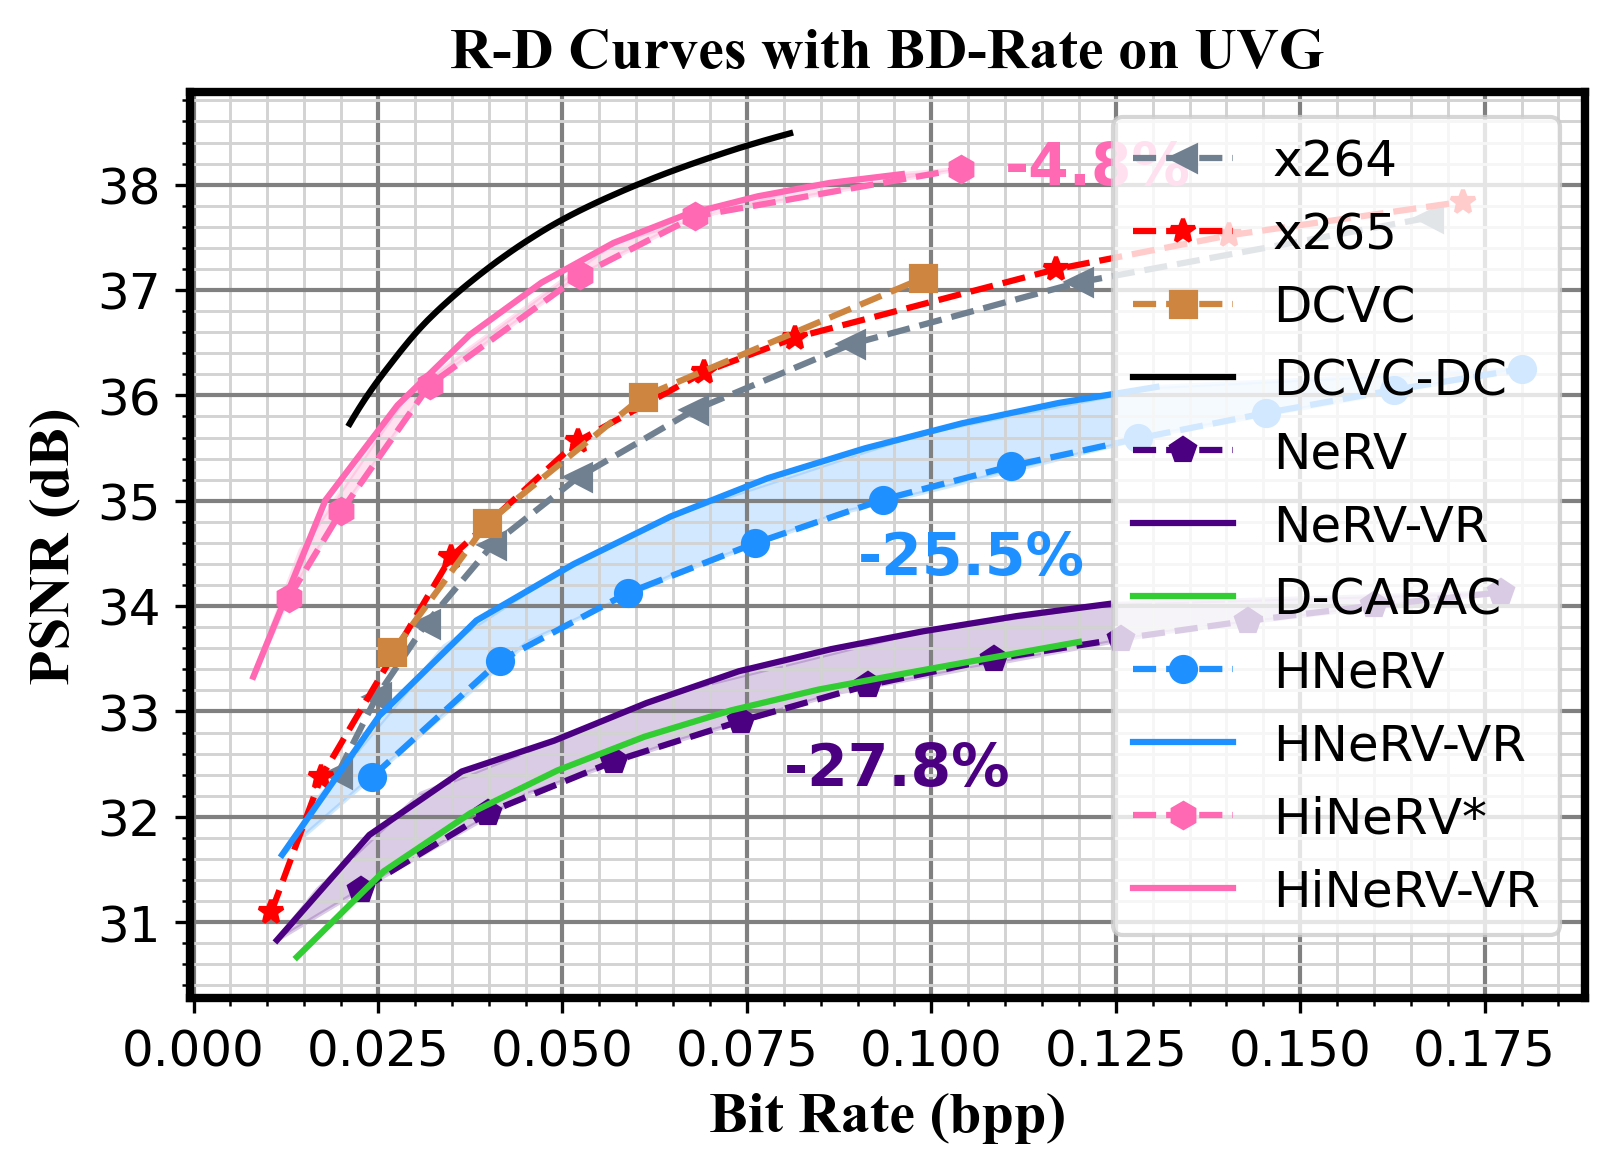

In [2]:
# font_path = './TIMES.TTF'
# font_prop = fm.FontProperties(fname=font_path)

font_prop = {"family" : 'Times New Roman'}
def setup_plot(font_size=14):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
    
    ax.grid(which='major', color='gray', linestyle='-', linewidth=1.0, zorder=0)
    ax.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.7, zorder=0)
    ax.minorticks_on()
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        
    ax.set_xlabel('Bit Rate (bpp)', fontproperties=font_prop, fontsize=font_size, fontweight='bold')
    ax.set_ylabel('PSNR (dB)', fontproperties=font_prop,  fontsize=font_size, fontweight='bold')
    ax.set_title('R-D Curves with BD-Rate on UVG', fontproperties=font_prop,  fontsize=font_size, fontweight='bold')

    return ax

def plot_curve(ax, bpp, psnr, label, color, linestyle, marker, linewidth=1.5, smooth=False):
    if smooth:
        x_new = np.linspace(min(bpp), max(bpp), 10)
        spl = make_interp_spline(bpp, psnr, k=2)  # k=2 for quadratic spline
        y_new = spl(x_new)
        ax.plot(x_new, y_new, color=color, linestyle=linestyle, marker=marker, linewidth=linewidth, label=label, zorder=2)
    else:
        ax.plot(bpp, psnr, color=color, linestyle=linestyle, marker=marker, linewidth=linewidth, label=label)

ax = setup_plot()

data = {
    'x264': {
        'bpp': [0.019529851,0.024798606,0.03145038,0.040445181,0.052089963,0.067762785,0.08908649,0.119998625,0.167446419],
        'psnr': [32.4076291,33.13900129,33.82915931,34.57786362,35.22131672,35.85809628,36.48485178,37.07316834,37.6872532],
        'color': '#708090', 'linestyle': '--', 'marker': '<'
    },
    
    'x265': {
        'bpp': [0.010533638,0.017297753,0.034846718,0.052092168,0.069226093,0.081516848,0.116900364,0.140282629,0.172093032],
        'psnr': [31.09701223,32.37807948,34.46285081,35.5652131,36.22249996,36.54785245,37.19775282,37.51812663,37.83899274],
        'color': 'r', 'linestyle': '--', 'marker': '*'
    },
    
    'DCVC': {
        'bpp': [0.026946852,0.039822457,0.060852451,0.098824209],
        'psnr': [33.56625311,34.79113846,35.98613648,37.11172044],
        'color': 'peru', 'linestyle': '--', 'marker': 's'
    },
    'DCVC-DC': {
        'bpp': [0.021155143,0.021564571,0.021987143,0.022418714,0.022862143,0.023312,0.023775857,0.024249,0.024727714,0.025231286,0.025749,0.026292714,0.026857714,0.02745,0.028054857,0.028672714,0.029288429,0.029896,0.030505571,0.031107143,0.031711429,0.032336857,0.032968143,0.033610429,0.034281,0.034961,0.035649286,0.036362429,0.037094571,0.037873429,0.038664571,0.039488429,0.040340429,0.041235429,0.042149714,0.043106857,0.044087143,0.045081714,0.046089143,0.047084714,0.048096429,0.049120857,0.050138,0.051187571,0.052267143,0.053358857,0.054504,0.055705571,0.056944571,0.058230143,0.059595286,0.061014429,0.062505286,0.064053714,0.065647857,0.067268429,0.068907857,0.070541143,0.072194571,0.073851571,0.075549429,0.077258429,0.079023286,0.080853143],
        'psnr': [35.730396,35.77925286,35.82777371,35.87702357,35.92543686,35.973731,36.02109643,36.06850671,36.115869,36.16328486,36.21186429,36.26127029,36.31217957,36.36554671,36.41939843,36.47241186,36.52513886,36.57483114,36.62291929,36.66809743,36.71223443,36.75520571,36.79809714,36.84018314,36.88268214,36.92564071,36.96730114,37.00942957,37.05174514,37.09570943,37.14013014,37.18462229,37.230132,37.27679686,37.32238514,37.369737,37.41664029,37.46242186,37.50729486,37.55106129,37.59342943,37.63469043,37.67353114,37.71266271,37.75118943,37.78854871,37.82690657,37.86551214,37.90398771,37.94358229,37.98401171,38.02488771,38.06653229,38.10828429,38.14940043,38.19052457,38.23049229,38.26932071,38.30779471,38.34508029,38.38116129,38.41684314,38.45178671,38.48703814],
        'color': 'black', 'linestyle': '-', 'marker': '',
    },

    'NeRV': {
        'bpp': [0.0227, 0.0453, 0.0655, 0.0875, 0.1314, 0.1772],
        'psnr': [31.31, 32.22, 32.72, 33.18, 33.75, 34.13],
        'color': 'indigo', 'linestyle': '--', 'marker': 'p', 'smooth': True
    },
    'NeRV-VR': {
        'bpp': [0.0113, 0.0168, 0.0308, 0.04875, 0.0651, 0.098, 0.124],
        'psnr': [30.83, 31.31, 32.22, 32.72, 33.18, 33.75, 34.02],
        'color': 'indigo', 'linestyle': '-', 'marker': '', 'smooth': True
    },
    
    'D-CABAC': {
        'bpp': [0.014, 0.0275, 0.0392, 0.052, 0.0761, 0.101, 0.12],
        'psnr': [30.67, 31.58, 32.10, 32.52, 33.07, 33.42, 33.66],
        'color': 'limegreen', 'linestyle': '-', 'marker': '', 'smooth': True
    },
    
    
    'HNeRV': {
        'bpp': [0.0242, 0.0453, 0.0655, 0.0875, 0.1314, 0.18],
        'psnr': [32.38, 33.66, 34.31, 34.88, 35.64, 36.25],
        'color': '#1E90FF', 'linestyle': '--', 'marker': 'o', 'smooth': True
    },
    'HNeRV-VR': {
        'bpp': [0.012, 0.01718, 0.034, 0.04915, 0.06561, 0.0986, 0.1305],
        'psnr': [31.64, 32.2, 33.62, 34.31, 34.88, 35.64, 36.08],
        'color': '#1E90FF', 'linestyle': '-', 'marker': '', 'smooth': True
    },
    
    
    'HiNeRV'+r'$*$': {
        'bpp': [0.0129, 0.02, 0.032, 0.0524, 0.0680, 0.104],
        'psnr': [34.08, 34.9, 36.1, 37.14, 37.7, 38.15],
        'color': 'hotpink', 'linestyle': '--', 'marker': 'h'
    },
    'HiNeRV-VR': {
        'bpp': [0.0081, 0.0145, 0.029, 0.0570, 0.0824, 0.096],
        'psnr': [33.33, 34.53, 36.01, 37.45, 37.9720, 38.1],
        'color': 'hotpink', 'linestyle': '-', 'marker': '', 'smooth': True
    },
    
}
for label, params in data.items():
    plot_curve(ax, params['bpp'], params['psnr'], label, params['color'], params['linestyle'], params['marker'], smooth=params.get('smooth', False))


intersection_x = []
intersection_y = []
for i in range(len(data['NeRV']['bpp'])):
    if data['NeRV']['bpp'][i] in data['NeRV-VR']['bpp']:
        intersection_x.append(data['NeRV']['bpp'][i])
        intersection_y.append(data['NeRV']['bpp'][i])

fill_x = []
fill_y = []
for x, y in zip(intersection_x, intersection_y):
    fill_x.append(x)
    fill_y.append(np.interp(x, data['NeRV']['bpp'], data['NeRV']['psnr']) - (np.interp(x, data['NeRV']['bpp'],  data['NeRV']['psnr']) - np.interp(x, data['NeRV-VR']['bpp'],  data['NeRV-VR']['psnr'])) / 2)
    
for x, y in zip(data['NeRV']['bpp'], data['NeRV']['psnr']):
    fill_x.append(x)
    fill_y.append(y)

for x, y in zip(reversed(data['NeRV-VR']['bpp']), reversed(data['NeRV-VR']['psnr'])):
    fill_x.append(x)
    fill_y.append(y)
    
plt.fill(fill_x, fill_y, color='indigo', alpha=0.2)
plt.text(0.08, 32.3, "-27.8%", color='indigo',  fontsize=14, fontweight='bold')


intersection_x = []
intersection_y = []
for i in range(len(data['HNeRV']['bpp'])):
    if data['HNeRV']['bpp'][i] in data['HNeRV-VR']['bpp']:
        intersection_x.append(data['HNeRV']['bpp'][i])
        intersection_y.append(data['HNeRV']['bpp'][i])

fill_x = []
fill_y = []
for x, y in zip(intersection_x, intersection_y):
    fill_x.append(x)
    fill_y.append(np.interp(x, data['HNeRV']['bpp'], data['HNeRV']['psnr']) - (np.interp(x, data['HNeRV']['bpp'],  data['HNeRV']['psnr']) - np.interp(x, data['HNeRV-VR']['bpp'],  data['HNeRV-VR']['psnr'])) / 2)
    
for x, y in zip(data['HNeRV']['bpp'], data['HNeRV']['psnr']):
    fill_x.append(x)
    fill_y.append(y)

for x, y in zip(reversed(data['HNeRV-VR']['bpp']), reversed(data['HNeRV-VR']['psnr'])):
    fill_x.append(x)
    fill_y.append(y)
    
plt.fill(fill_x, fill_y, color='#1E90FF', alpha=0.2)
plt.text(0.09, 34.3, "-25.5%", color='#1E90FF',  fontsize=14, fontweight='bold')


intersection_x = []
intersection_y = []
for i in range(len(data['HiNeRV'+r'$*$']['bpp'])):
    if data['HiNeRV'+r'$*$']['bpp'][i] in data['HiNeRV-VR']['bpp']:
        intersection_x.append(data['HiNeRV'+r'$*$']['bpp'][i])
        intersection_y.append(data['HiNeRV'+r'$*$']['bpp'][i])

fill_x = []
fill_y = []
for x, y in zip(intersection_x, intersection_y):
    fill_x.append(x)
    fill_y.append(np.interp(x, data['HiNeRV'+r'$*$']['bpp'], data['HiNeRV'+r'$*$']['psnr']) - (np.interp(x, data['HiNeRV'+r'$*$']['bpp'],  data['HiNeRV*']['psnr']) - np.interp(x, data['HiNeRV-VR']['bpp'],  data['HiNeRV-VR']['psnr'])) / 2)
    
for x, y in zip(data['HiNeRV'+r'$*$']['bpp'], data['HiNeRV'+r'$*$']['psnr']):
    fill_x.append(x)
    fill_y.append(y)

for x, y in zip(reversed(data['HiNeRV-VR']['bpp']), reversed(data['HiNeRV-VR']['psnr'])):
    fill_x.append(x)
    fill_y.append(y)
    
plt.fill(fill_x, fill_y, color='hotpink', alpha=0.2)
plt.text(0.11, 38., "-4.8%", color='hotpink',  fontsize=14, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tick_params(axis='both', which='minor', labelsize=12)

ax.legend(loc=0, fontsize=12)
# plt.savefig('./RD-curve3.pdf', bbox_inches='tight', dpi=600, format="pdf")

plt.show()
